# 1. Load the libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

# 2.Importing the dataset:

In [5]:
wine_df = pd.read_csv('wine.xls', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
wine_df.head(2)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


# Extracting the independent variable X and dependent variable Y

In [8]:
X = wine_df.drop("Cultivator",axis=1)
Y = wine_df["Cultivator"]

# 3.Visualize the data:

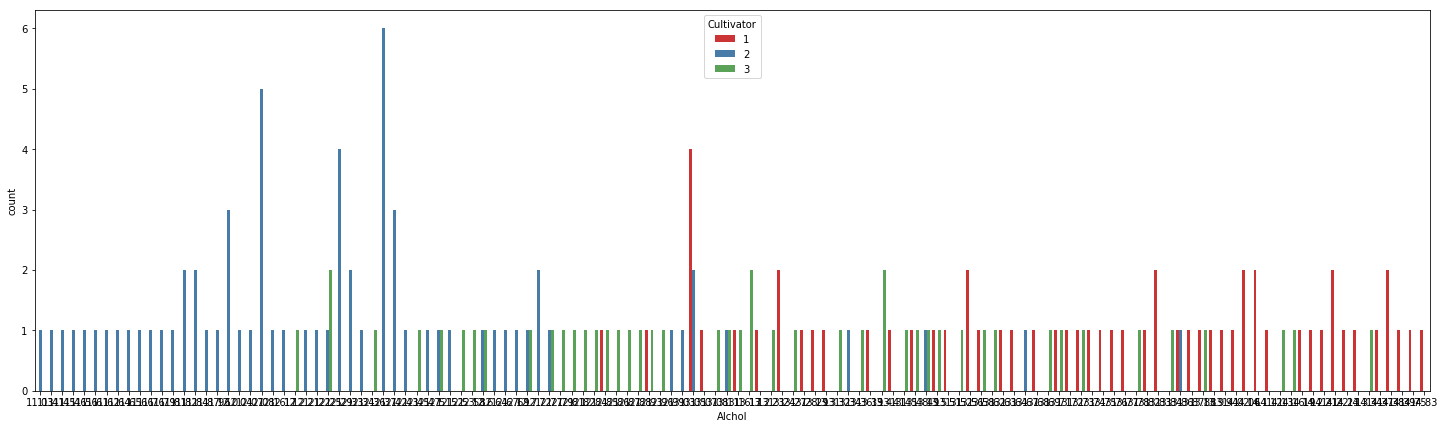

In [9]:
plt.figure(figsize=(25,7))
sns.countplot(x="Alchol",hue="Cultivator",data=wine_df,palette="Set1")

# 4.Split the data into train and test set:

In [87]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/3, 
                                                     random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

# 5.Train a Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 7, random_state = 100)
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

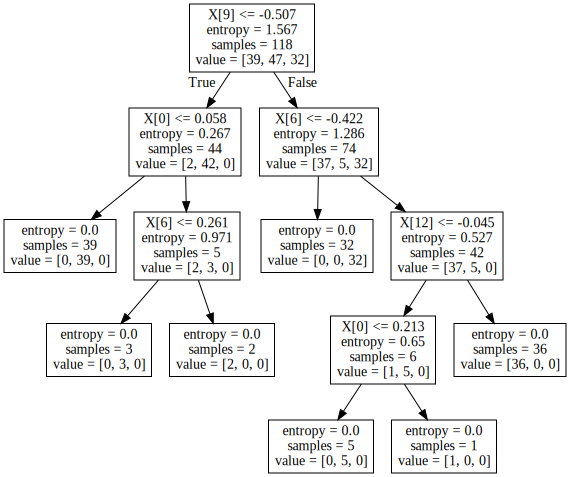

In [90]:
from sklearn import tree
import graphviz
#train_char_label = ['1', '2', '3']
dot_data = tree.export_graphviz(d_tree, out_file=None)#, feature_names = list(X_train), class_names = list(train_char_label)) 
graph = graphviz.Source(dot_data) 
graph.render("wine_df") 
graph

# 6.Predict the model:

In [91]:
Predict = d_tree.predict(X_test)
Predict

array([1, 3, 2, 1, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3], dtype=int64)

# 7.Evaluation the model:

In [92]:


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Predict))
print(confusion_matrix(Y_test,Predict))
print("accuracy_score:",accuracy_score(Y_test,Predict))

             precision    recall  f1-score   support

          1       0.91      1.00      0.95        20
          2       1.00      0.88      0.93        24
          3       0.94      1.00      0.97        16

avg / total       0.95      0.95      0.95        60

[[20  0  0]
 [ 2 21  1]
 [ 0  0 16]]
accuracy_score: 0.95


# 8.Random Forest:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, Y_train)  
Y_pred = regressor.predict(X_test)  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
wine_df = pd.read_csv('wine.xls', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
X = wine_df.drop("Cultivator",axis=1)
Y = wine_df["Cultivator"]
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/3, 
                                                     random_state = 0)


C:\Users\Name\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 50, criterion = 'entropy' ,max_depth= 3)
RFC.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))  

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_pred = RFC.predict(X_test) 
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))  
print(accuracy_score(Y_test, Y_pred))  

[[ 0 20  0]
 [ 0 24  0]
 [ 0 16  0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        20
          2       0.40      1.00      0.57        24
          3       0.00      0.00      0.00        16

avg / total       0.16      0.40      0.23        60

0.4


C:\Users\Name\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [114]:

dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3, random_state = 100)
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train,Y_train)
dt_model.score(X_train,Y_train)

1.0

In [115]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= credit_tree_regularized)# , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

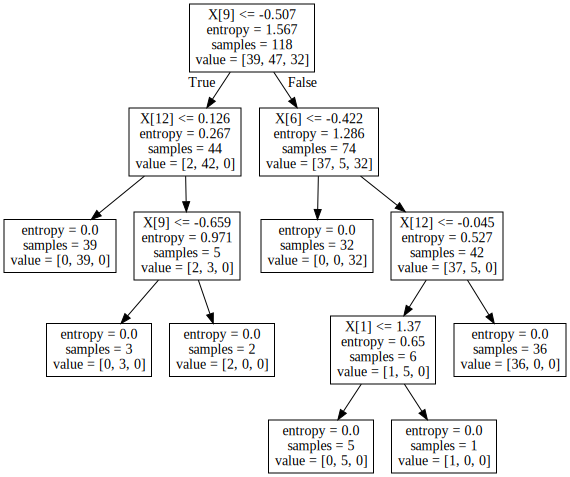

In [116]:
import graphviz 
#train_char_label = ['1', '2', '3']
dot_data = tree.export_graphviz(dt_model, out_file=None)#,class_names= list(train_char_label),feature_names = list(X_train)) 
graph = graphviz.Source(dot_data) 
graph.render("wine_df") 
graph